# 02 &mdash; Probability Distribution Analysis

*(Data Analysis and Visualization 505067 &mdash; Final Report)*

## Prerequisites

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")

### Loading data

In [2]:
df = pd.read_csv("../data/salaries.csv")

## Plots

### Histogram + KDE plot

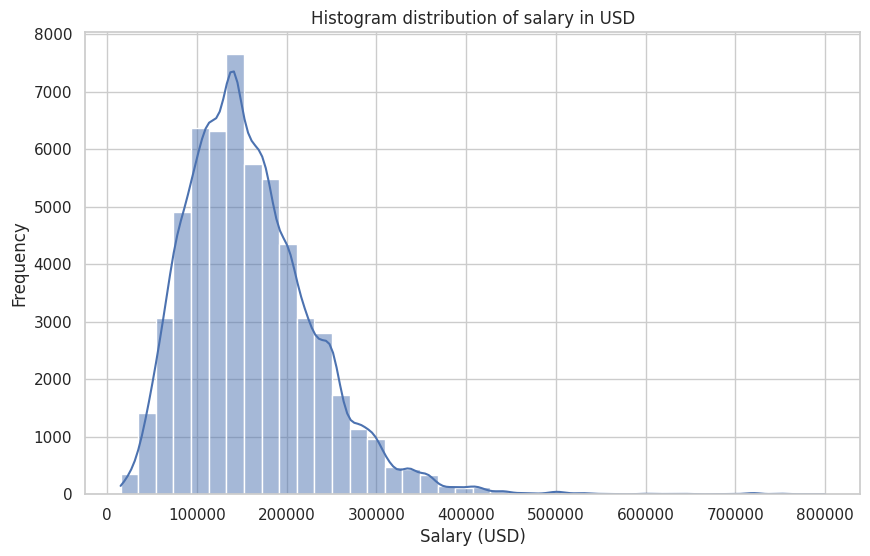

In [18]:
plt.figure(figsize=(10, 6))

sns.histplot(df["salary_in_usd"], bins=40, kde=True)

plt.title("Histogram distribution of salary in USD")

plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")

plt.show()

### Q-Q plot

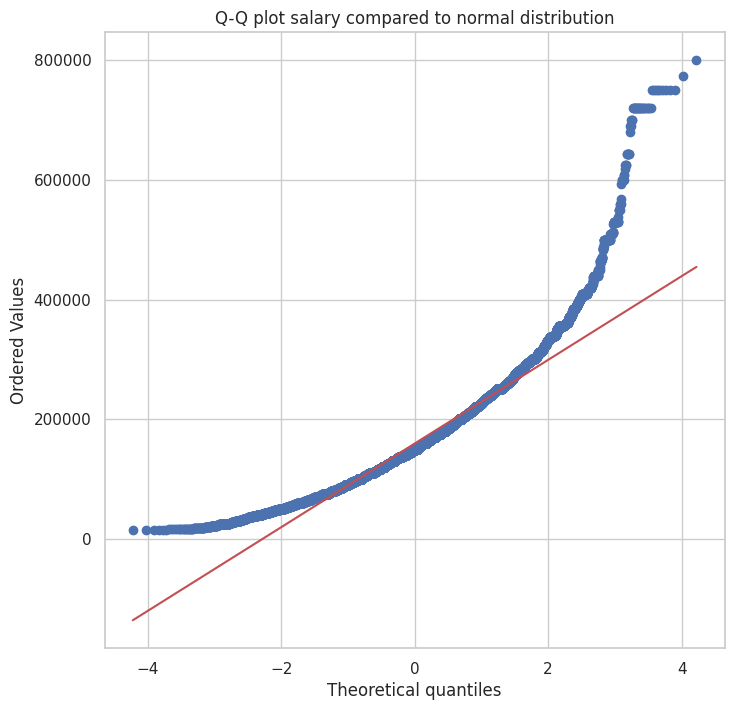

In [13]:
plt.figure(figsize=(8, 8))

stats.probplot(df["salary_in_usd"], dist="norm", plot=plt)

plt.title("Q-Q plot salary compared to normal distribution")

plt.show()

## Shapiro–Wilk and Kolmogorov–Smirnov tests

In [16]:
sample = df["salary_in_usd"].sample(3_000, random_state=42)

shapiro_stat, shapiro_p = stats.shapiro(sample)
print("Shapiro–Wilk test p-value =", shapiro_p)

scaled = (sample - sample.mean()) / sample.std()
kstest_stat, kstest_p = stats.kstest(scaled, 'norm')
print("Kolmogorov–Smirnov test p-value =", kstest_p)

Shapiro–Wilk test p-value = 2.4757955189865164e-35
Kolmogorov–Smirnov test p-value = 9.331293102255341e-14


## Log-transformation

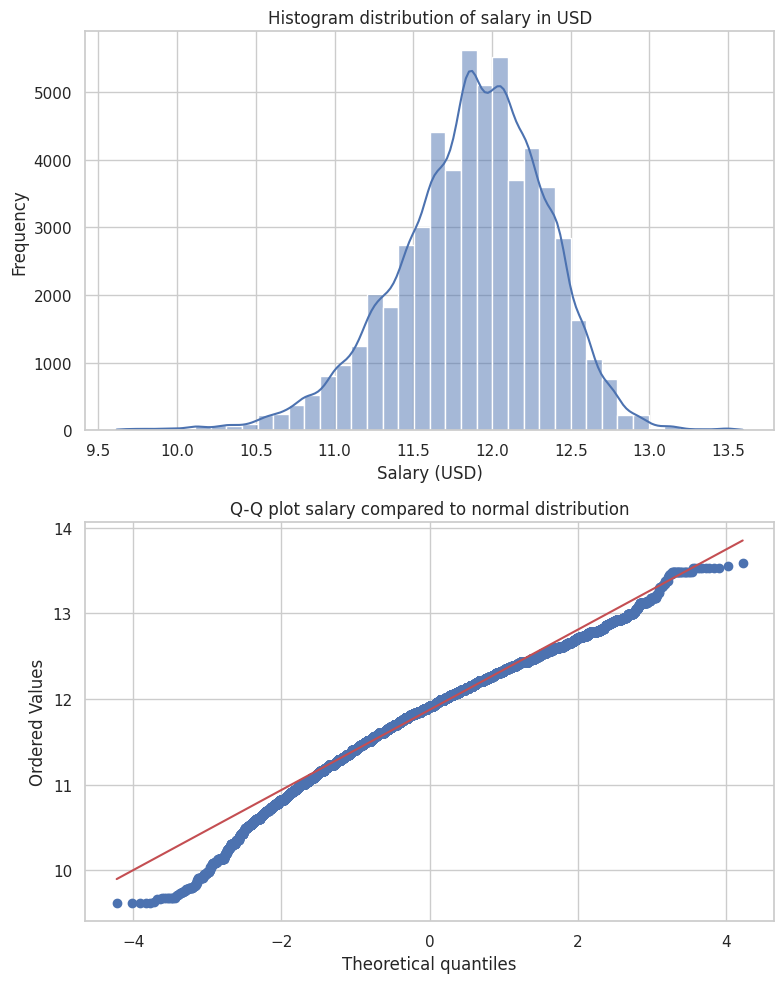

In [24]:
log_salary = np.log(df["salary_in_usd"])

fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.histplot(log_salary, bins=40, kde=True, ax=axes[0])

axes[0].set_title("Histogram distribution of salary in USD")

axes[0].set_xlabel("Salary (USD)")
axes[0].set_ylabel("Frequency")

stats.probplot(log_salary, dist="norm", plot=axes[1])

axes[1].set_title("Q-Q plot salary compared to normal distribution")

plt.tight_layout()

plt.show()

## Summary

* Salary does not follow a normal distribution (Shapiro&ndash;Wilk and Kolmogorov&ndash;Smirnov tests show p-value < 0.05).
* Log-transformation significantly improves normality.